In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(scaled=True)

# Convert to pandas DataFrame for easier manipulation
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

In [79]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


**Checking for null values**

In [80]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [81]:
y.isna().sum()

0

## Exploratory Data Analysis

### Descriptive analysis

In [82]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Number of samples: 442
Number of features: 10


In [83]:
X.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


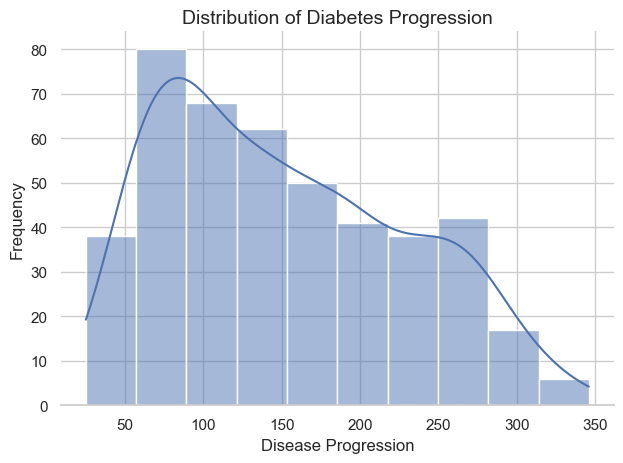

In [ ]:
# Set seaborn aesthetic style
sns.set_style("whitegrid")

# Histogram with pastel colors
ax = sns.histplot(y, kde=True)

# Title and labels
plt.title("Distribution of Diabetes Progression", fontsize=14)
plt.xlabel("Disease Progression", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Cleaner look
sns.despine(left=True)
plt.tight_layout()

### Pairplot

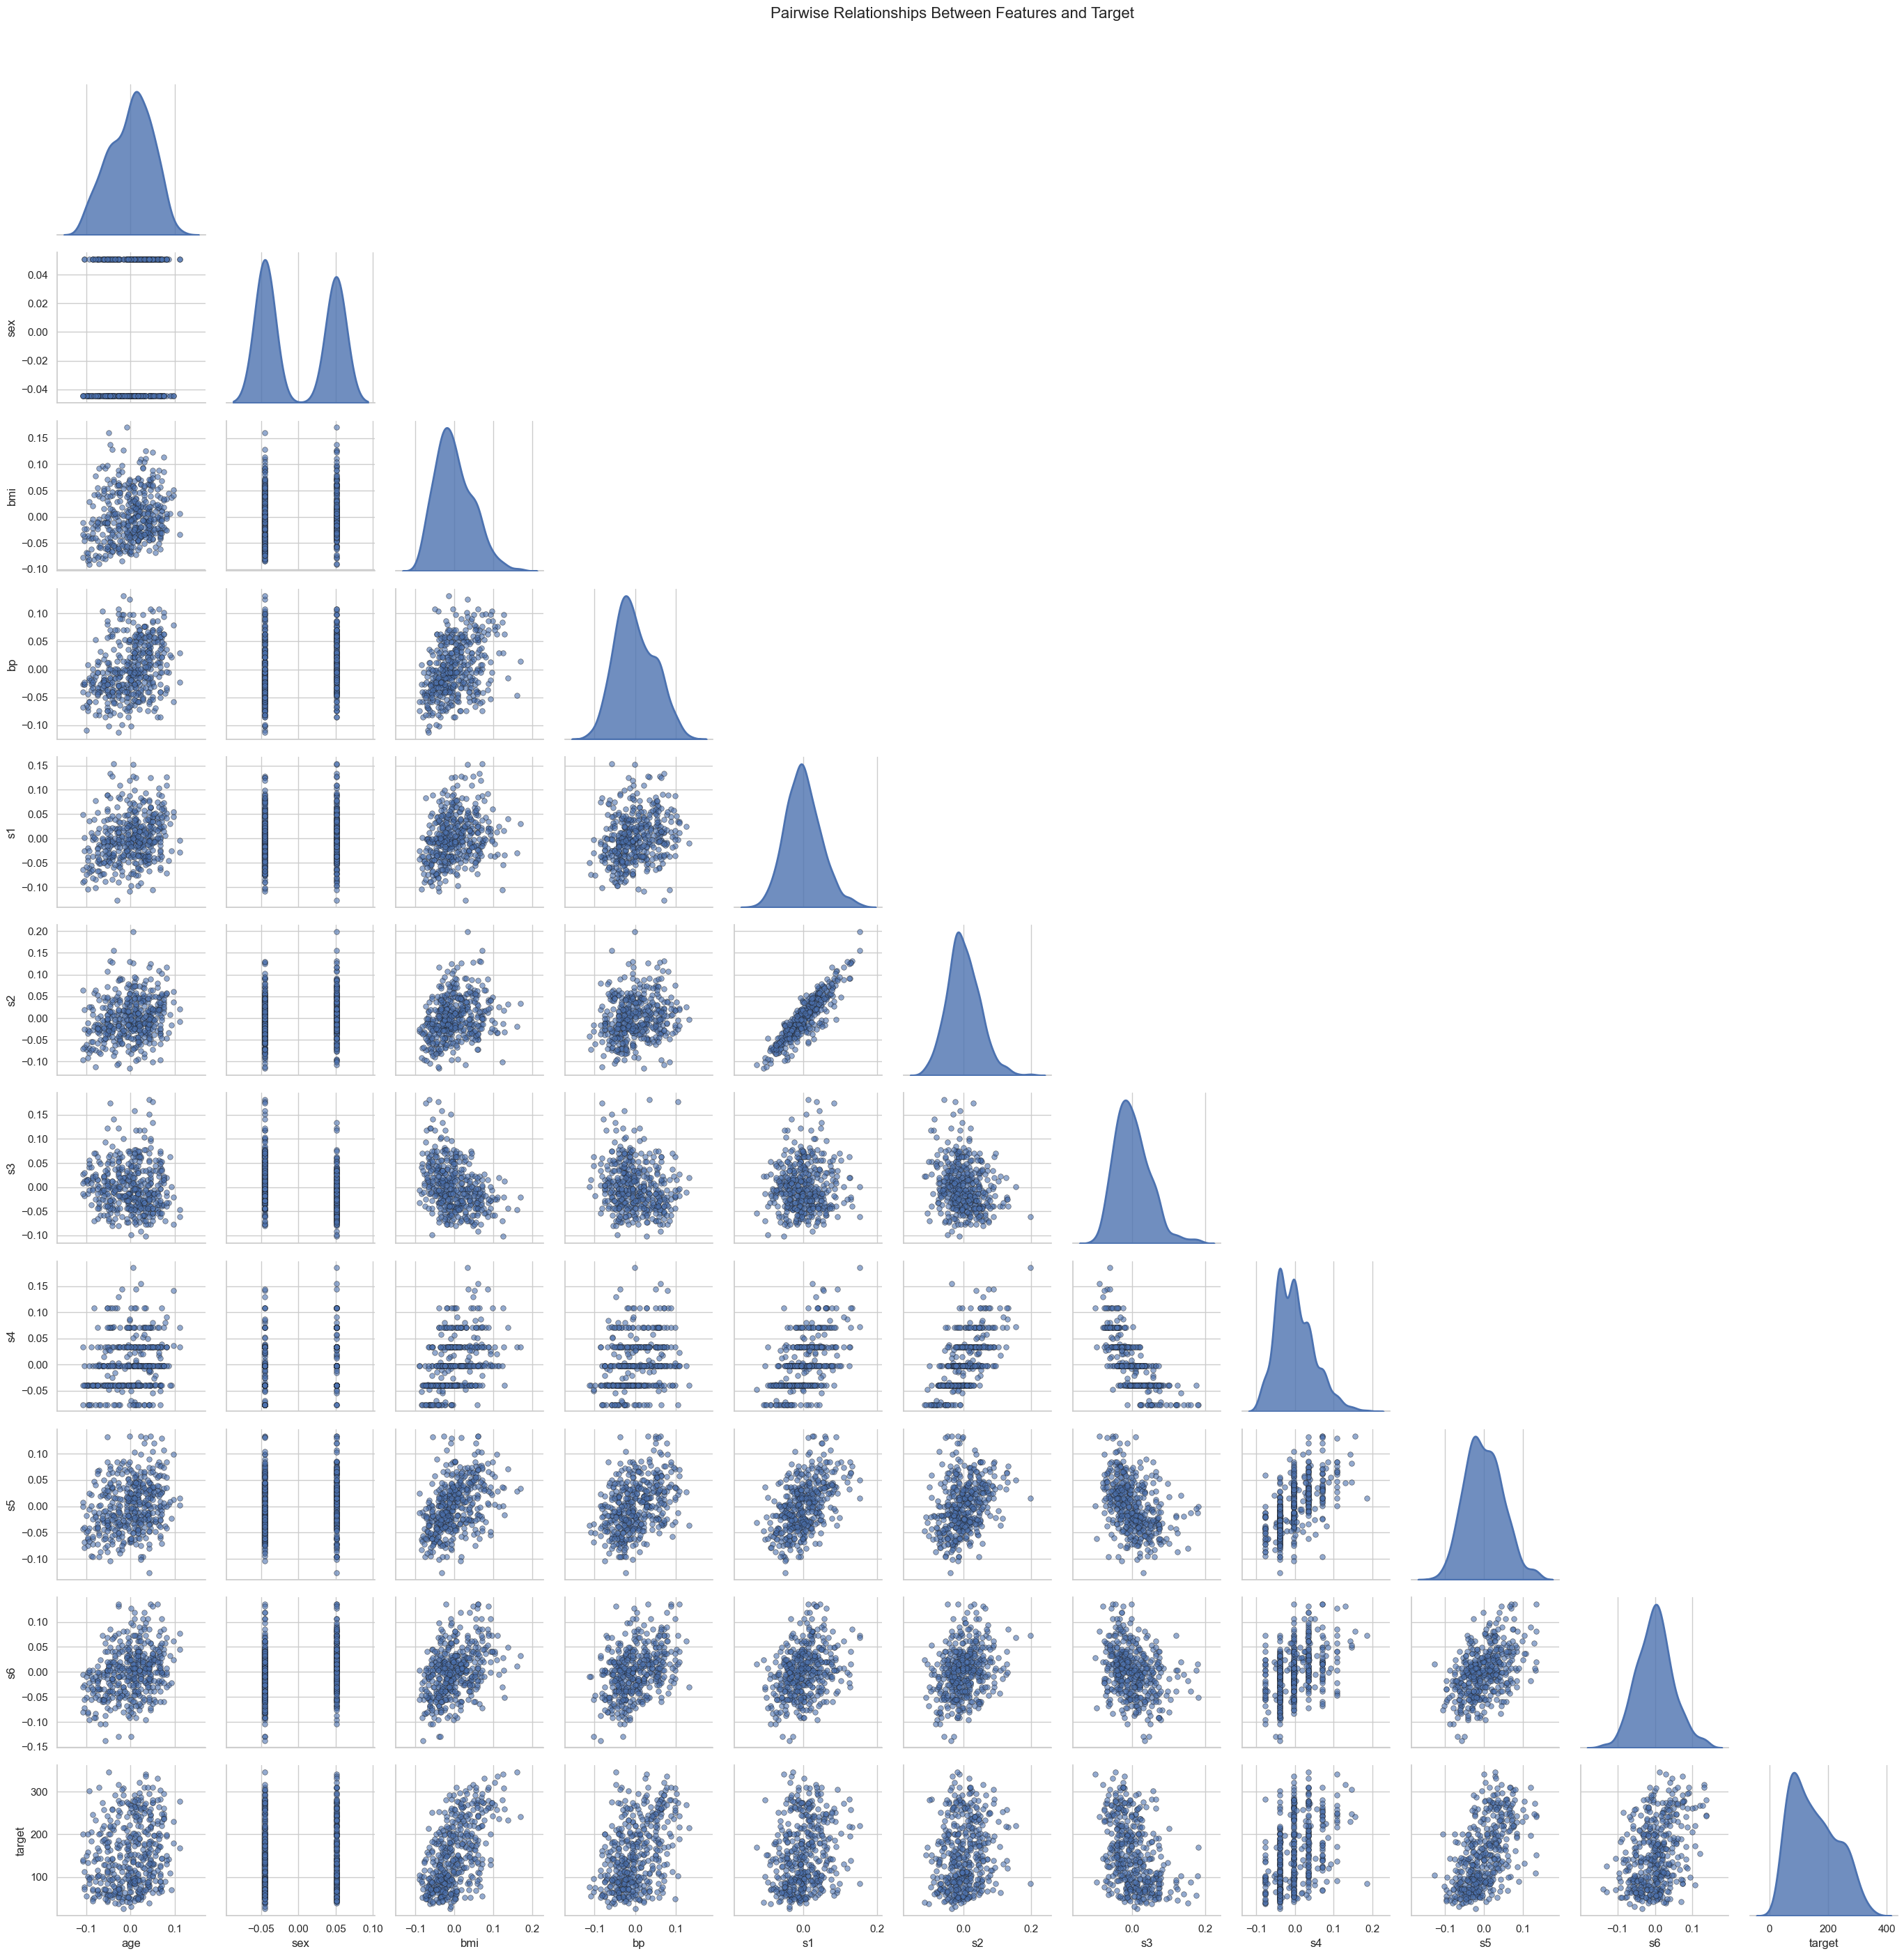

In [ ]:
# Create a combined DataFrame with features and target for visualization
df = pd.concat([X, y], axis=1)

# Create pairplot with custom settings
pairplot = sns.pairplot(
    data=df,
    diag_kind="kde",  # Use KDE plots on the diagonal
    plot_kws={"alpha": 0.6, "s": 30, "edgecolor": "k", "linewidth": 0.5},
    diag_kws={"linewidth": 2, "alpha": 0.8},
    corner=True,  # Show only the lower triangle
)

# Set title for the entire figure
pairplot.fig.suptitle(
    "Pairwise Relationships Between Features and Target", y=1.02, fontsize=16
)
plt.tight_layout()

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Crear un dataset de ejemplo
data = pd.DataFrame(
    {
        # Variables continuas
        "edad": [25, 30, 45, 60, 35],
        "salario": [30000, 45000, 60000, 75000, 40000],
        "experiencia": [2, 5, 15, 30, 7],
        # Variables categóricas
        "genero": ["M", "F", "M", "F", "M"],
        "educacion": [
            "Bachiller",
            "Universidad",
            "Posgrado",
            "Universidad",
            "Posgrado",
        ],
        "departamento": ["Ventas", "TI", "Finanzas", "RRHH", "TI"],
    }
)

# Definir las columnas continuas y categóricas
columnas_continuas = ["edad", "salario", "experiencia"]
columnas_categoricas = ["genero", "educacion", "departamento"]

# Crear el ColumnTransformer
preprocesador = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), columnas_continuas),
        # drop='first' to avoid multicollinearity
        # Sparse output is set to False when working with datasets that don't have too many
        # categories. When dealing with datasets that have many categories or categorical
        # variables with a large number of unique values, setting sparse_output=True would be
        # more memory efficient as most of the resulting columns from one-hot encoding
        # will be zeros.
        ("cat", OneHotEncoder(drop="first", sparse_output=False), columnas_categoricas),
    ]
)

# Aplicar las transformaciones
X_transformado = preprocesador.fit_transform(data)

# Obtener los nombres de las características resultantes
nombres_caracteristicas_ohe = preprocesador.named_transformers_[
    "cat"
].get_feature_names_out(columnas_categoricas)
nombres_caracteristicas = columnas_continuas + nombres_caracteristicas_ohe.tolist()

# Crear un DataFrame con los datos transformados
datos_procesados = pd.DataFrame(X_transformado, columns=nombres_caracteristicas)

datos_procesados

,edad,salario,experiencia,genero_M,educacion_Posgrado,educacion_Universidad,departamento_RRHH,departamento_TI,departamento_Ventas
0,-1.128152,-1.264911,-0.973403,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.725241,-0.316228,-0.675423,0.0,0.0,1.0,0.0,1.0,0.0
2,0.483494,0.632456,0.317846,1.0,1.0,0.0,0.0,0.0,0.0
3,1.692228,1.581139,1.807749,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.322329,-0.632456,-0.476769,1.0,1.0,0.0,0.0,1.0,0.0


In [87]:
datos_procesados

,edad,salario,experiencia,genero_M,educacion_Posgrado,educacion_Universidad,departamento_RRHH,departamento_TI,departamento_Ventas
0,-1.128152,-1.264911,-0.973403,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.725241,-0.316228,-0.675423,0.0,0.0,1.0,0.0,1.0,0.0
2,0.483494,0.632456,0.317846,1.0,1.0,0.0,0.0,0.0,0.0
3,1.692228,1.581139,1.807749,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.322329,-0.632456,-0.476769,1.0,1.0,0.0,0.0,1.0,0.0


### Correlation Matrix

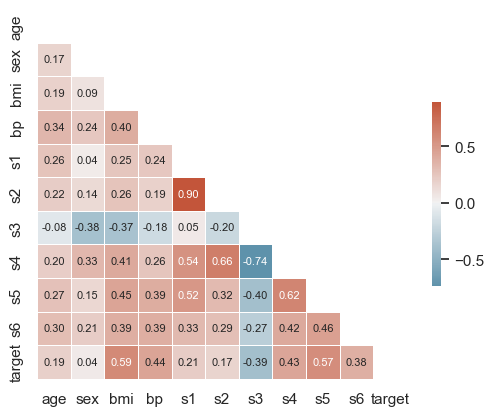

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix using pearson method
# Note: The default method is 'pearson'
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 8},
);

## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=51
)

## Lineral Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
models = [LogisticRegression(), Ridge(alpha=1.0), Lasso(alpha=0.5)]

def evaluate_models(X_train, y_train, X_test, y_test, models):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2
